# Libraries
* Execute this cell before going any further.
> You will need the `sympy` library to complete this assignment. In your terminal, enter the following command:  
> `conda install sympy`

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
sp.init_printing()

<br/><br/>

# Warmup: Symbolic models and approximations in molecular motion

In this lab, you will use numerical methods to study vibrational and rotational motion. Before doing that, it is useful to revisit how **simple analytic models** are built and manipulated. Symbolic computation allows us to work with exact mathematical expressions, which helps clarify assumptions before we introduce numerical approximations.

In this warmup, you will use `SymPy` to construct and analyze simple models of molecular motion. The goal is not to become fluent in symbolic algebra, but to connect analytic expressions to the physical models you already know from general chemistry and to prepare for the numerical work that follows.

Throughout this section, focus on the *meaning* of each expression rather than on syntax.

---

## 1. Symbols as physical quantities

In symbolic computation, variables represent exact mathematical objects rather than numerical values. This allows us to represent physical quantities abstractly, without committing to specific units or parameters.

In vibrational models, we commonly work with a position coordinate $x$, a mass $m$, and either a force constant $k$ or an angular frequency $\omega$.

In the cell below, define these quantities symbolically and confirm that SymPy treats them as algebraic objects. Here is the [SymPy documentation](https://docs.sympy.org/latest/guides/assumptions.html#:~:text=What%20these%20examples,number.%20For%20example) to get started.

In [2]:
# TODO: define x as a real-valued symbol
x = sp.Symbol('x', real=True)
# TODO: define m, k, and omega as positive real symbols
m = sp.Symbol('m', real=True, positive=True)
k = sp.Symbol('k', real=True, positive=True)
k = sp.Symbol('k', real=True, positive=True)
omega = sp.Symbol('omega', real=True, positive=True)

x, m, k, omega

## 2. Harmonic potentials and restoring forces

Near equilibrium, a chemical bond behaves like a spring. The simplest model of this behavior is the harmonic potential
$$
V(x) = \tfrac12 k x^2.
$$

This model appears throughout physical chemistry because it captures small oscillations while remaining analytically solvable.

In the next cell, you will construct this potential symbolically and compute the corresponding force. Use a SymPy [Rational](https://www.geeksforgeeks.org/python/python-sympy-rational-method/) for coeffiecients, and [calculus](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html) to move from potentail to force.


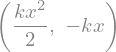

In [3]:
# TODO: define the harmonic potential V(x) = (1/2) k x^2
V = sp.Rational(1, 2) * k * x ** 2
# TODO: compute the force F(x) = -dV/dx
F = -sp.diff(V, x)

V, F

## Short Answer Response
What physical law does your expression for $F(x)$ correspond to? How does this connect to how vibrational motion is introduced in general chemistry?

## Answer

Hooke’s law. The force is proportional to displacement and directed toward equilibrium, modeling a chemical bond as a spring. This is how vibrational motion is introduced in general chemistry, where atoms oscillate about an equilibrium bond length.

## 3. Substitution and parameter interpretation

Symbolic expressions become physical predictions only after parameters are specified. [Substitution](https://docs.sympy.org/latest/tutorials/intro-tutorial/basic_operations.html) lets us explore how a model behaves for particular choices without recomputing the algebra.

In the next cell, substitute a numerical value for $k$ and simplify the result.

In [ ]:
# TODO: substitute k = 2 into your expression for F
result = F.subs(k, 2)
# TODO: simplify the result
sp.simplify(result)

## Short Answer Response
If $k$ increases, does the restoring force for a given displacement increase or decrease? Explain in one sentence.

## Answer

It increases, because a larger force constant $k$ means the bond is stiffer and produces a stronger restoring force for the same displacement from equilibrium.

## 4. Approximations near equilibrium

Real molecular potentials are not perfectly harmonic. However, near equilibrium they can often be approximated as harmonic by expanding them about the minimum.

In this task, you will examine the small-$x$ behavior of a more complicated function using a Taylor series. (Hint: what class did you learn about series expansion in!) The [$O(g(x))$ notation](https://en.wikipedia.org/wiki/Big_O_notation) tells us that there is some constnat $M$ such that our error is less than $M \cdot g(x)$.


In [ ]:
expr = (1 - sp.exp(-x))**2

# TODO: compute the Taylor series of expr about x = 0 up to x^4
expr.series(x, 0, 5)

## Short Answer Response
Which terms dominate near $x=0$? Why does this justify replacing a complicated potential with a harmonic one near equilibrium?

## Answer

Near $x=0$, the quadratic term dominates while higher-order terms become negligible. This justifies replacing a realistic molecular potential with a harmonic one near equilibrium, because small vibrational displacements only probe the locally quadratic region of the potential

## 5. From exact functions to numerical representations

Up to this point, everything has been exact. In the rest of the lab, you will replace continuous functions with **discrete representations** and exact derivatives with **finite differences**.

Before moving on, you will perform one small numerical experiment that previews this idea.

In the next cell, convert one of your symbolic expressions into a numerical function and evaluate it on a grid.


In [ ]:
# TODO: turn V(x) into a numerical function using sp.lambdify
V_func = sp.lambdify(x, result)
# TODO: create a small grid of x values from -1 to 1
grid_x = np.arange(-1, 1.1, 0.1)
# TODO: evaluate V(x) on this grid and store the result in an array
V_func(grid_x)

## Short Answer Response
What has changed conceptually when you move from a symbolic expression to an array of values? How might storing function values in an array relate to representing a wavefunction later in the lab?

## Answer

Moving from a symbolic expression to an array of values replaces an exact function with a discrete numerical representation evaluated at specific points. Storing function values in an array is analogous to representing a wavefunction by its coefficients in a chosen basis, which later allows operators to act on the wavefunction through matrix–vector multiplication.

## 6. Looking ahead

You have now seen three key ideas that will drive the rest of this lab:

1. Physical models start as analytic expressions.
2. Approximations simplify those expressions near equilibrium.
3. Numerical work replaces functions with finite sets of values.

In the next section, you will represent wavefunctions as vectors of coefficients and operators as matrices acting on those vectors. This is the same conceptual move that underlies molecular orbital theory, vibrational spectra, and quantum thermodynamics.

<br/><br/>
<br/><br/>

# Vibrational and Rotational Motion


To fully understand the motion of quantum objects such as molecules, it is necessary to understand how quantum mechanics describes translational, vibrational, and rotational motion. Each type of motion contributes differently to molecular energy levels and to experimentally observable properties such as spectra and thermodynamic behavior.

Previously, we explored translational motion using the particle-in-a-box model. In that model, the wavefunction was confined by boundary conditions and the allowed energies emerged from solving an eigenvalue problem. In this lab, we extend those ideas to **vibrational and rotational motion** by studying two central models in physical chemistry: the quantum harmonic oscillator and the rigid rotor.

In general chemistry and organic chemistry, you learned that atomic orbitals are wavefunctions and that molecular orbitals are formed by taking linear combinations of those atomic orbitals. In that picture, the molecular orbital is not a new kind of object, it is the same wavefunction, simply represented using a different set of building blocks.

In this lab, we use exactly the same idea, but applied to vibrational and rotational motion instead of electrons. The key difference is the choice of basis. Rather than using atomic orbitals, we will represent wavefunctions using values on a grid of points. Once we make this choice, wavefunctions become vectors of coefficients, operators become matrices, and solving the Schrödinger equation becomes an eigenvalue problem.

## Vibrational Motion – Quantum Harmonic Oscillator

Chemical bonds are not rigid. Instead, they behave much like springs, oscillating about an equilibrium bond length. These oscillations are known as **molecular vibrations**, and in quantum mechanics they possess discrete, quantized energy levels. Vibrational energy levels play a central role in infrared (IR) spectroscopy and contribute directly to molecular thermodynamic quantities such as internal energy, entropy, and heat capacity.

In the classical spring model, the restoring force acting on a particle displaced by a distance $x$ from equilibrium is given by Hooke’s law,
$$
F = -kx,
$$
where $k$ is the **spring constant**, with units of force per unit distance. The corresponding potential energy associated with this force is
$$
V(x) = \frac{1}{2}kx^2.
$$

To describe this system quantum mechanically, we incorporate the harmonic potential into the Schrödinger equation. The resulting Hamiltonian operator for the one-dimensional harmonic oscillator is
$$
\hat{H}\psi(x)
=
-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)
+
\frac{1}{2}m\omega^2 x^2 \psi(x),
$$
where $\hbar$ is the reduced Planck constant, $m$ is the mass of the oscillating particle, and $\omega$ is the angular frequency of the oscillator.

To simplify the calculations and focus on the structure of the problem rather than on units, we will work in a system of units where $\hbar = 1$ and $m = 1$. Throughout this section, we will also neglect normalization constants when they are not essential for the physical interpretation.


## Representing wavefunctions on a computer (discretization)

The Schrödinger equation for the harmonic oscillator is written in terms of derivatives acting on a continuous wavefunction $\psi(x)$. That form is ideal for analytic work, but it is not directly usable on a computer, because a computer cannot store an infinite amount of information about a function.

To do computations, we must choose a finite representation for the wavefunction. In this lab we will represent $\psi(x)$ by its values on a grid of points spanning a finite interval $[-L,L]$. Once we make this choice, the wavefunction is stored as a vector of numbers,
$$
\psi \;\equiv\;
\begin{pmatrix}
\psi(x_1) \\
\psi(x_2) \\
\vdots \\
\psi(x_n)
\end{pmatrix}.
$$
You should interpret this vector the same way you interpret coefficients in molecular orbital theory. In general chemistry, a molecular orbital is written as a linear combination of atomic orbitals, and the MO is determined by a list of coefficients. Here, the “basis functions” are associated with grid points, and the wavefunction is determined by the list of its values at those points. This is why discretization can be viewed as a choice of basis set.

In the next cells, you will build the grid and practice treating wavefunctions as coefficient vectors. After that, we will build operators that act on these vectors, which is the step that turns differential operators into matrices.


In [ ]:
# Choose a spatial window and resolution.
# L controls how far out in space we represent the wavefunction.
# N controls how many grid points we use (larger N means smaller dx).
L = 8.0
N = 801

# TODO: build a grid x_full on [-L, L] with N points (include endpoints)
x_full = np.linspace(-L, L, num=N, endpoint=True)


# TODO: compute the grid spacing dx from x_full
dx = x_full[1] - x_full[0]

# We will impose boundary conditions ψ(-L)=ψ(L)=0 by solving only on the interior points.
# TODO: define x as the interior grid (drop the first and last points)
x_array = x_full[1:-1]

# TODO: define n = number of interior points
n = len(x_array)

# For simple numerical integrals on a uniform grid, we can use weights w_i = dx.
w = dx * np.ones_like(x_array)

print("dx =", dx)
print("n  =", n)
print("x range =", (int(x_full[0]), int(x_full[-1])))

# Now create two trial wavefunctions as vectors on the grid. Use sympy to write the equation
# and convert it to a python function as above
# These are not eigenfunctions yet; they are just example shapes.
trial_phi_1 = 1.0 - sp.Abs(x) / 8.0
trial_1_func = sp.lambdify(x, trial_phi_1)
phi_1 = trial_1_func(x_array)

trial_phi_2 = sp.cos(x)
trial_2_func = sp.lambdify(x, trial_phi_2)
phi_2 = trial_2_func(x_array)

# TODO: Define a Gaussian psi_g(x) = exp(-a x^2)
a = sp.Symbol('a', real=True, positive=True)
psi_g_expr = sp.exp(-a * x ** 2)
psi_g_func = sp.lambdify([a, x], psi_g_expr)
psi_g = psi_g_func(0.5, x_array)

# TODO: define a sine-like function psi_s(x) that has at least one node
# A common choice is psi_s = sin(pi*(x+L)/(2L)), which is zero at the endpoints of [-L, L]
l = sp.Symbol('L', real=True, positive=True)
psi_s_expr = sp.sin(sp.pi * (x + l) / (2 * L))
psi_s_func = sp.lambdify([l, x], psi_s_expr)
psi_s = psi_s_func(2.0 * L, x_array)

# TODO: write a function inner(psi, phi, w) that approximates ⟨psi|phi⟩ = ∫ psi*(x) phi(x) dx
# Use a weighted sum with w. For real arrays, psi* = psi.
def inner(psi, phi, w):
    I = 0
    for i in range(n):
        I += psi[i] * phi[i] * w[i]
    return I

# TODO: write a function normalize(psi, w) that returns psi / sqrt(inner(psi, psi, w))
def normalize(psi, w):
    return psi / np.sqrt(inner(psi, psi, w))

# TODO: normalize psi_g and psi_s
psi_gn = normalize(psi_g, w)
psi_sn = normalize(psi_s, w)

# TODO: compute and print norms and overlap
print("norm(psi_gn) ≈", inner(psi_gn, psi_gn, w))
print("norm(psi_sn) ≈", inner(psi_sn, psi_sn, w))
print("<g|s> ≈", inner(psi_gn, psi_sn, w))

### Interpreting wavefunctions as coefficient vectors

In this section, you represented wavefunctions as arrays of numbers defined on a grid. Each entry in the array corresponds to the value of the wavefunction at a specific point in space.

This representation should be interpreted in the same way that molecular orbitals are interpreted in general chemistry. A molecular orbital is defined by a list of coefficients multiplying atomic orbitals. Here, the “basis functions” are associated with grid points, and the wavefunction is defined by its list of values on that grid.

The inner product you implemented plays the same role as the overlap integral between orbitals. Normalization ensures that the total probability remains equal to one.


## Short answer Response  
Why does normalizing a wavefunction represented on a grid require an approximate integral rather than a simple sum?


## Answer

Because the wavefunction represents a continuous probability density, normalization requires integrating over space; on a grid this integral must be approximated by a weighted sum rather than a simple unweighted sum of values.

## Operators acting on discretized wavefunctions
In quantum mechanics, physical observables such as kinetic energy and potential energy are represented by operators that act on wavefunctions. When a wavefunction is represented as a vector of values on a grid, an operator must take one vector as input and produce another vector as output.

We will begin by constructing the kinetic energy operator through its defining action: the second derivative with respect to position. Rather than writing down a matrix immediately, we will first implement how this operator acts on a discretized wavefunction.

On a continuous coordinate, the kinetic energy operator involves the second derivative $d^2\psi/dx^2$. On a grid, derivatives must be approximated using information from nearby points. In this lab, we will use a **centered finite-difference approximation**, which estimates the curvature of the wavefunction at a grid point \(x_i\) by comparing the value of the wavefunction at that point to its values at the two adjacent points $x_{i-1}$ and $x_{i+1}$:
$$
\frac{d^2\psi}{dx^2}(x_i)
\;\approx\;
\frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{\Delta x^2}.
$$

This approximation captures how sharply the wavefunction bends near \(x_i\), which is precisely the physical content of kinetic energy. Importantly, it depends only on the wavefunction at three nearby points. As a result, the kinetic energy at a given position is determined entirely by the local behavior of the wavefunction, not by distant regions of space. This locality will play a crucial role when we later represent the kinetic energy operator as a matrix.

You will have to deal with endpoints differently since we only have points in $[-L, L]$. What did we assume any values outside this window would be?

In [ ]:
# Finite-difference approximation to the second derivative

def second_derivative(psi, dx):

    d2psi = np.zeros_like(psi)
    n = len(psi)

    # left edge: neighbor outside domain is 0
    d2psi[0] = (psi[1] - 2*psi[0] + 0.0) / dx**2

    # true interior
    for i in range(1, n - 1):
        d2psi[i] = (psi[i+1] - 2*psi[i] + psi[i-1]) / dx**2

    # right edge: neighbor outside domain is 0
    d2psi[n-1] = (0.0 - 2*psi[n-1] + psi[n-2]) / dx**2

    return d2psi


# TODO: apply the second derivative to one of your normalized trial wavefunctions
d2psi_test = second_derivative(psi_gn, dx)

### Locality of the second derivative and matrix structure

Notice that the finite-difference approximation for the second derivative at a grid point depends only on the wavefunction values at that point and its immediate neighbors. This means that the kinetic energy at one position is determined entirely by nearby points in space.

When we represent this operation as a matrix acting on a vector of wavefunction values, this locality has a direct consequence: each row of the matrix contains nonzero elements only on the diagonal and the two adjacent diagonals. Such a matrix is called **tridiagonal**.

This structure is not an algebraic coincidence. It reflects the physical fact that, in our approximation, kinetic energy couples only neighboring regions of space.


In [ ]:
# Construct the Laplacian matrix by applying the operator to basis vectors

Lap = np.zeros((n, n))

# TODO: for each basis vector e_j, apply second_derivative and store the result
# Hint: e_j is a vector with a 1 at position j and 0 elsewhere

for j in range(n):
    e_j = np.zeros(n)
    e_j[j] = 1.0
    Lap[:, j] = second_derivative(e_j, dx)

Lap

## Short Answer Response
Inspect the matrix `Lap`. Which entries are nonzero, and how does this reflect the finite-difference formula you used for the second derivative?

## Answer

The matrix has nonzero entries only on the main diagonal and the first diagonals above and below it. This reflects the finite-difference formula for the second derivative, which depends only on the wavefunction value at a point and its two nearest neighbors, so each grid point is coupled only to adjacent points.

### From operators to eigenfunctions

You have now implemented how the second-derivative operator acts on a discretized wavefunction. This operation is the core ingredient of the kinetic energy operator. When it is combined with the potential energy, which acts by multiplying the wavefunction value at each grid point, we obtain the full Hamiltonian operator for the harmonic oscillator.

Once the Hamiltonian is represented in a chosen basis, it becomes a matrix acting on vectors of wavefunction coefficients. In this representation, the Schrödinger equation
$$
\hat H \psi = E \psi
$$
becomes a matrix equation. Solving this equation means finding special wavefunctions that are mapped back onto themselves by the Hamiltonian, changing only by an overall constant factor. These special wavefunctions are called **eigenfunctions**, and the corresponding constants are the allowed energy levels.

Diagonalization is the numerical procedure that finds these eigenfunctions and energies. In the basis defined by the eigenfunctions, the Hamiltonian no longer mixes different states: each eigenfunction is associated with a single energy and evolves independently. This is why diagonalization greatly simplifies the problem and why it plays a central role in computational quantum mechanics.

More generally, a matrix represents how a linear transformation acts on vectors written in a particular basis. This is directly analogous to molecular orbital theory from general and organic chemistry. When molecular orbitals are written as linear combinations of atomic orbitals, the Hamiltonian matrix expressed in the atomic-orbital basis typically mixes many orbitals together. Acting with the Hamiltonian on an arbitrary combination of atomic orbitals produces a new state that is itself a mixture of atomic orbitals.

The same situation occurs here. When we represent the Hamiltonian in the grid basis, each basis function corresponds to a localized region of space. Acting with the Hamiltonian on a wavefunction written in this basis generally produces a new wavefunction that is a linear combination of many grid basis functions. In other words, the Hamiltonian mixes the basis functions, just as it mixes atomic orbitals in molecular orbital theory.

Diagonalization finds a new basis in which this mixing disappears. In molecular orbital theory, diagonalizing the Hamiltonian matrix in the atomic-orbital basis produces molecular orbitals, which are the special linear combinations of atomic orbitals that have definite energies. Here, diagonalizing the Hamiltonian matrix in the grid basis produces vibrational eigenfunctions, which are special linear combinations of grid basis functions that have definite energies.

In this eigenfunction basis, the Hamiltonian acts in the simplest possible way: it no longer mixes different states, but instead multiplies each eigenfunction by its corresponding energy. This is why diagonalization turns a complicated matrix operation into a set of simple multiplications and why eigenfunctions provide the natural description of stationary quantum states.

Run the animation below to see how the same transformation looks complicated in one basis but becomes simple in another.

In [ ]:
from helper import animate_diagonalization_demo
plt.rc("animation", html="jshtml")
animate_diagonalization_demo()

In the next steps, you will assemble the Hamiltonian matrix, diagonalize it using NumPy, and obtain its eigenvalues and eigenvectors. When you later use plotting functions to visualize harmonic-oscillator wavefunctions, remember that each plotted curve is simply one of these eigenvectors, interpreted as the values of a wavefunction on the spatial grid.

### From the Laplacian to the kinetic energy operator

The kinetic energy operator in one dimension is
$$
\hat T = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}.
$$
In our discretized representation, the second derivative is represented by the Laplacian matrix you just constructed. Multiplying this matrix by the appropriate constants produces the kinetic energy operator in matrix form.

In this lab, we work in units where $\hbar = 1$ and $m = 1$, so the kinetic energy operator simplifies to
$$
\hat T = -\frac{1}{2}\frac{d^2}{dx^2}.
$$

In [ ]:
# Build the kinetic energy matrix from the Laplacian
T = -0.5 * Lap

### Potential energy as a diagonal operator

Unlike the kinetic energy, the potential energy depends only on position. This means that, in a grid basis, the potential energy operator does not mix different grid points. Instead, it multiplies the wavefunction value at each point by the value of the potential at that same point.

As a result, the potential energy operator is represented by a diagonal matrix in the grid basis.


In [ ]:
# Define the harmonic potential on the grid
omega = 1.0
V_x = 0.5 * omega**2 * x_array**2

# Build the potential energy matrix (Hint: NumPy has a function to turn a vector into a diagonal matrix) 
V = np.diag(V_x)

### Assembling the Hamiltonian matrix

The total energy operator, or Hamiltonian, is the sum of the kinetic and potential energy operators. In matrix form, this is simply
$$
H = T + V.
$$

In [ ]:
# Define the Hamiltonian H
H = T + V

### Solving the Schrödinger equation numerically

In matrix form, the Schrödinger equation becomes an eigenvalue problem. Diagonalizing the Hamiltonian matrix reveals the allowed energy levels and their corresponding wavefunctions.

Because the Hamiltonian matrix is real and symmetric, we use `np.linalg.eigh`, which is optimized for this type of problem.

In [ ]:
# Diagonalize the Hamiltonian
energies, eigenvectors = np.linalg.eigh(H)

# Extract the lowest few eigenvalues and eigenfunctions
E0, E1, E2 = energies[:3]
psi0 = eigenvectors[:, 0]
psi1 = eigenvectors[:, 1]
psi2 = eigenvectors[:, 2]

print("Lowest three energies:", E0, E1, E2)

## Short Answer Response
Before plotting, predict how many nodes each of the first three eigenfunctions should have and whether they should be symmetric or antisymmetric about $x=0$.

## Answer

The ground-state eigenfunction should have no nodes and be symmetric about $x=0$. The first excited state should have one node and be antisymmetric, and the second excited state should have two nodes and be symmetric.

### Visual test of an eigenfunction

Use the plotting helper to visualize the lowest three energy eigenfunctions of the harmonic oscillator. Pay close attention to the shapes of $\psi(x)$ and $\hat H \psi(x)$.


In [ ]:
from helper import plot_qho_numeric
plot_qho_numeric(x_array, eigenvectors[:, 0], Lap, dx)
plot_qho_numeric(x_array, eigenvectors[:, 1], Lap, dx)
plot_qho_numeric(x_array, eigenvectors[:, 2], Lap, dx)

Now choose a wavefunctions that is *not* an eigenfunction, such as your earlier trial sine wavefunctions, and visualize it using the same plotting function.

**Note:**  
For wavefunctions that are not eigenfunctions, the kinetic energy operator can produce values much larger in magnitude than the wavefunction itself, so pass `scaled = True` to the plotting function. To make the shapes visible, the operator-applied curves are rescaled for plotting. Only the *shape*, not the magnitude, is physically relevant in this comparison.

In [ ]:
plot_qho_numeric(x_array, psi_sn, Lap, dx, scaled=True)

### SHORT RESPONSE QUESTIONS
1. Can a wavefunction in a harmonic potential ever have zero energy? Why or why not?
2. Compare the appearance of $\hat{H}\psi(x)$ and $\psi(x)$. What do you notice about these two functions when the $\psi$ is an eigenfunciton of $\hat{H}$? When it isn't?
3. What are the energy eigenvalues for the first few eigenfunctions of the harmonic osciallator potential? Write a formula relating the energy to the quantum number $n$ and the angular frequency $\omega$.
### ANSWERS

1. No, a wavefunction in such a potential can never have zero energy, because any wavefunction that is continuous, differentiable, and finite (normalizable) will have some concavity and thus some energy. There is also potential energy at every point.
2. When the energy is clearly defined, the function $\hat{H}\psi(x)$ has the same shape as $\psi(x)$, but this is not true when the energy is not clearly defined.
3. The energy eigenvalues for the first three eigenfunctions of the harmonic oscillator potential are $\omega/2$,$3\omega/2$, and $5\omega/2$. We can write a formula for energy as $E = (n + 1/2)\omega $, where the quantum number n is 0, 1, 2 ...

### Comparison with analytic harmonic oscillator energies

The analytic energy levels of the harmonic oscillator are
$$
E_n = \omega\left(n + \tfrac12\right).
$$

Compare your numerical energies to the analytic values.

In [ ]:
for n in range(3):
    print(n, energies[n], omega*(n + 0.5), energies[n] - omega*(n + 0.5))

<br/><br/>

## Rotational Motion I: The Planar Rotor (Particle on a Ring)

We now turn from vibrational motion to rotational motion. In many molecules, especially diatomic molecules, rotation can be treated independently of vibration to a good approximation. The simplest quantum model of rotation is the **planar rotor**, also known as a particle constrained to move on a ring.

In this model, the distance from the rotation axis is fixed, so the only degree of freedom is the angular coordinate $\phi$. The wavefunction $\psi(\phi)$ describes how the probability amplitude varies as the particle rotates around the ring. Because angles repeat, the wavefunction must satisfy a **periodic boundary condition**:
$$
\psi(\phi + 2\pi) = \psi(\phi).
$$

This periodicity distinguishes rotational motion from the vibrational motion studied earlier, where the wavefunction vanished at the boundaries of the spatial domain.

The Hamiltonian for the planar rotor contains only kinetic energy. In units where $\hbar = 1$, it is given by
$$
\hat H = -\frac{1}{2I}\frac{d^2}{d\phi^2},
$$
where $I$ is the moment of inertia. Physically, this operator measures how rapidly the wavefunction changes as the particle moves around the ring, just as the kinetic energy operator for vibrations measured curvature with respect to position.

To solve this problem numerically, we again represent the wavefunction by its values on a discrete grid. We divide the interval $\phi \in [0,2\pi)$ into evenly spaced points and store the values of $\psi(\phi)$ in a vector. The second derivative with respect to $\phi$ is approximated using the same finite-difference scheme as before. However, the periodic boundary condition means that the grid “wraps around”: the neighbor of the last grid point is the first grid point, and vice versa.

As a result, the finite-difference representation of the second derivative leads to a matrix that is nearly tridiagonal, but with additional nonzero elements connecting the first and last grid points. These entries encode the periodic nature of rotational motion and ensure that the wavefunction remains continuous as $\phi$ increases past $2\pi$.

Once the Hamiltonian is written as a matrix acting on the vector of wavefunction values, the Schrödinger equation again becomes an eigenvalue problem. Diagonalizing the Hamiltonian yields the allowed rotational energy levels and their corresponding eigenfunctions. As in the vibrational case, these eigenfunctions are the special linear combinations of grid basis functions that are not mixed by the Hamiltonian, but are instead simply scaled by their energies.

In the following steps, you will construct the finite-difference Hamiltonian for the planar rotor, diagonalize it numerically, and compare the resulting energy levels to the analytic expression for a rigid rotor. This will reinforce the idea that discretization, operator construction, and diagonalization form a unified framework for solving quantum mechanical problems.


In [ ]:
# Choose moment of inertia and grid resolution
I = 1.0
N_phi = 400  # increase for better accuracy

# Build a uniform grid on [0, 2π), excluding the endpoint 2π to avoid duplicating 0
phi = np.linspace(0.0, 2.0 * np.pi, num=N_phi, endpoint=False)
dphi = phi[1] - phi[0]

# Construct the periodic second-derivative matrix D2 on the phi grid
# TODO: start with an N_phi x N_phi zero matrix
D2 = np.zeros((N_phi, N_phi))

# TODO: fill the main diagonal and the first off-diagonals using the centered finite difference
for i in range(0, N_phi-1):
    D2[i,i]       = -2 / dphi**2
    D2[i,i+1]     =  1 / dphi**2   # when i+1 is in range
    D2[i,i-1]     =  1 / dphi**2   # when i-1 is in range

for i in range(N_phi):
    D2[i, i] = -2.0 / dphi**2

    if i + 1 < N_phi:
        D2[i, i + 1] = 1.0 / dphi**2
    if i - 1 >= 0:
        D2[i, i - 1] = 1.0 / dphi**2

# TODO: enforce periodic boundary conditions by "wrapping" the neighbors
# That means point 0 is adjacent to point N_phi-1 and vice versa.
D2[0, N_phi - 1] = 1.0 / dphi**2
D2[N_phi - 1, 0] = 1.0 / dphi**2

# Build the Hamiltonian matrix
H_rot = -(1.0 / (2.0 * I)) * D2

# Diagonalize (real symmetric)
E_rot, psi_rot = np.linalg.eigh(H_rot)

print("Lowest 7 planar-rotor energies:", E_rot[:7])

### Degeneracy in rotational energy levels

When you diagonalized the Hamiltonian for the planar rotor, you likely observed that several energy levels appear more than once. This is not a numerical artifact, but a physical feature of rotational motion. The analytic energy levels of the planar rotor depend on the square of an integer quantum number, $E_m = m^2/(2I)$, which means that states with quantum numbers $+m$ and $-m$ have the same energy.

This degeneracy arises from the symmetry of the system. Rotating clockwise or counterclockwise around the ring does not change the total kinetic energy, so the Hamiltonian cannot distinguish between these two directions of motion. As a result, distinct wavefunctions corresponding to opposite directions of rotation are mapped to the same energy eigenvalue when the Hamiltonian is diagonalized.

Degeneracy is therefore a direct consequence of symmetry. In this case, it reflects the fact that the planar rotor is invariant under reversal of the direction of rotation. This idea will carry over directly to the three-dimensional rigid rotor, where rotational symmetry leads to even higher degeneracies.

### Short Answer Response
Why do clockwise and counterclockwise rotational states of the planar rotor have the same energy?

### Answer

Clockwise and counterclockwise rotations have the same kinetic energy because the Hamiltonian depends on the square of the angular momentum, not its direction, so reversing the direction of rotation does not change the energy.

## Rotational Motion II: The Rigid Rotor

The planar rotor provides a simple setting in which rotational motion, discretization, and diagonalization can be explored explicitly. Real molecules, however, are free to rotate in three dimensions rather than being confined to a plane. To model this behavior, we turn to the **rigid rotor**.

In the rigid rotor model, the atoms in a molecule are assumed to remain at fixed distances from one another, neglecting vibrational motion. As a result, rotation changes only the molecule’s orientation in space, not its shape or size. Because orientation in three dimensions is naturally described by angles, the rigid rotor is most conveniently expressed using **spherical coordinates**, labeled by the angles $\theta$ and $\phi$.

The Hamiltonian for the rigid rotor again contains only kinetic energy, but now associated with rotation in three dimensions. Its eigenfunctions are the **spherical harmonics**, denoted
$$
Y_J^m(\theta,\phi),
$$
which play the same role for rotational motion that the harmonic-oscillator eigenfunctions played for vibrations. Each spherical harmonic is an eigenfunction of the rotational Hamiltonian and corresponds to a well-defined rotational energy level.

Although the full derivation of the spherical harmonics is beyond the scope of this lab, we can still examine their shapes, energies, and degeneracies. In particular, the additional symmetry of three-dimensional rotation leads to a characteristic $(2J+1)$-fold degeneracy for each rotational energy level, extending the ideas of symmetry and degeneracy that you observed in the planar rotor.


### CODE
* Explore spherical coordinates using the `interactive_spherical_plot()` function.
* Visualize the allowed rigid rotor wavefunctions using the `plot_rigid_rotor()` function.

In [19]:
from helper import interactive_spherical_plot
interactive_spherical_plot()

interactive(children=(FloatSlider(value=1.05, description='r', max=1.5, min=0.6, step=0.05), FloatSlider(value…

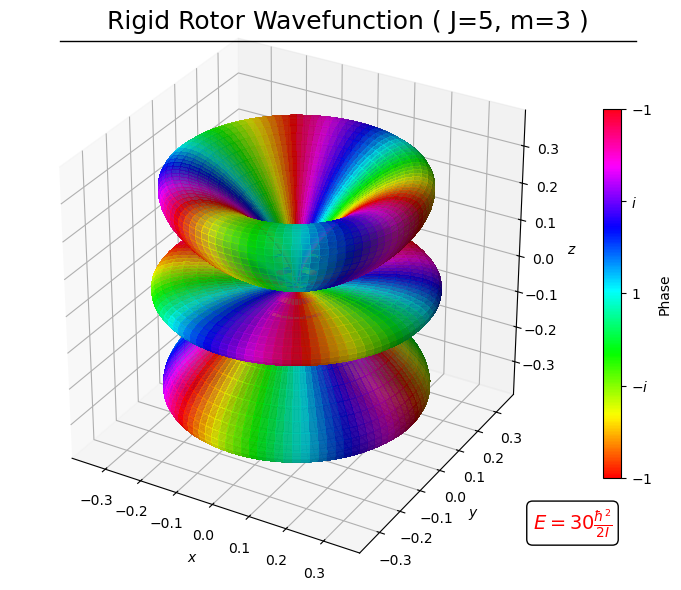

In [20]:
from helper import plot_rigid_rotor
plot_rigid_rotor(5,3)

### SHORT RESPONSE QUESTIONS
1. What boundary conditions must the rigid rotor wavefunction satisfy?
2. What do the values $m = 0$ and $m = \pm J$ represent in terms of the particle's motion in spherical coordinates $\theta$ and $\phi$?
3. What are the allowed energy levels of the rigid rotor, expressed as a function of $J$, $m$, or both?
4. Write a function for the degeneracy (the number of states with the same energy) of the rigid rotor energy levels as a function of $J$, $m$, or both.
### ANSWERS

1. The boundary conditions are that $\psi(\phi)$ must the the same value for all $\phi$ at $\theta = 0$ and $\theta = \pi$, and that $\psi(\phi) = \psi(\phi + 2\pi)$.
2. m = 0 roughly corresponds to the particle moving up and down about $\theta$ without moving about $\phi$; m = +- J corresponds to the particle moving as much as possible (given the boundary conditions) in one or the other direction about $\phi$.
3. The allowed energy levels of the rigid rotor are given by $E = J(J+1) \frac{\hbar^2}{2I}$.
4. The degeneracy of rigid rotor energy levels is given by $D = 2J + 1$.

<br/><br/>
<br/><br/>

# Applications of Molecular Motions

Now that we have explored the fundamental quantum-mechanical descriptions of translational, vibrational, and rotational motion, we can examine why these models matter in practice. These types of motion are not merely theoretical constructs; they play a central role in determining molecular energies, spectra, and thermodynamic properties.

In quantum chemistry, the total energy of a molecule is built up from contributions associated with electronic structure as well as nuclear motion. Translational, vibrational, and rotational degrees of freedom each contribute quantized energy levels, and these levels directly influence observable quantities such as reaction free energies and equilibrium constants.

Vibrational motion is especially important in infrared (IR) spectroscopy. Each vibrational eigenfunction corresponds to a normal mode of motion, and transitions between vibrational energy levels give rise to absorption peaks in an IR spectrum. By computing vibrational frequencies and mode shapes, it is possible to generate a simulated IR spectrum that can be directly compared with experiment, providing a powerful tool for validating molecular structures.

In practice, most quantum chemistry programs combine these ideas using the **Rigid Rotor–Harmonic Oscillator (RRHO)** approximation. In this framework, translational motion is treated as a free particle, rotational motion is described by the rigid rotor model, and vibrational motion is approximated using the harmonic oscillator. The key assumption is that these motions can be treated independently, using the same mathematical models you have explored in this lab. Although approximate, the RRHO model is remarkably effective for predicting thermodynamic properties of molecules near equilibrium.


### LIBRARIES
* Execute this cell before going any further.

In [21]:
import psi4
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

## Reaction Thermodynamics: OPT + FREQ

One of the most common workflows in quantum chemistry is a **geometry optimization** followed by a **frequency calculation**. These two steps serve distinct but complementary purposes.

A geometry optimization locates an equilibrium molecular structure by minimizing the forces on the nuclei. Vibrational frequencies are defined as small oscillations about this equilibrium geometry, so they are only physically meaningful when the structure has been optimized. If a frequency calculation is performed on a non-optimized geometry, the resulting frequencies may be distorted or even unphysical.

A single-point energy calculation provides only the electronic contribution to the molecular energy. However, thermodynamic quantities such as the enthalpy change $\Delta H$, entropy change $\Delta S$, and Gibbs free energy change $\Delta G$ require additional contributions from vibrational, rotational, and translational motion. These contributions are obtained from a frequency calculation using the RRHO approximation.

In the remainder of this section, we will apply these ideas by examining a chemically relevant example: the Diels–Alder reaction between ethene and butadiene. This will allow us to see how the quantum mechanical models of molecular motion developed in this lab are used to predict reaction thermodynamics in real chemical systems.

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.

In [22]:
from helper import xyz_from_smiles
from helper import show_molecule
from helper import create_psi4_molecule

### CODE

1. Create SMILES strings for ethene, butadiene, and cyclohexene. Use the `show_molecule` helper function to verify that each structure corresponds to the intended molecule.

2. Using Psi4, perform a [geometry optimization](https://psicode.org/psi4manual/master/optking.html) for each molecule and compute the electronic reaction energy,
$$
\Delta E_{\mathrm{elec}}^{\mathrm{rxn}} = E_{\mathrm{products}} - E_{\mathrm{reactants}},
$$
    for the Diels–Alder reaction:

    <div style="text-align: center;">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZPg2KUKbOOjXwX135DpBgBuPAeW9W4kYheQ&s">
    </div>

    * Use the `create_psi4_molecule` helper function to convert each SMILES string into a Psi4 molecule object.
    * Make sure to create a unique [output files](https://psicode.org/psi4manual/master/external_apis.html#psi4.set_output_file) for each molecule using `psi4.set_output_file`.
    * Save and reuse these output files so that the optimized geometries are available for later steps.

4. Perform [frequency calculations](https://psicode.org/psi4manual/master/freq.html) on the optimized geometries. Use the results to [compute](https://psicode.org/psi4manual/master/api/psi4.core.variable.html) the reaction enthalpy $\Delta H^{\mathrm{rxn}}$ and Gibbs free energy $\Delta G^{\mathrm{rxn}}$ by combining the corresponding thermodynamic quantities for products and reactants.

   * The frequency calculation provides vibrational, rotational, and translational contributions using the RRHO approximation.
   * Larger molecules may produce warnings; these reflect approximations in the model and can be safely ignored for this exercise.
   * Psi4 reports energies in Hartrees. Convert all final thermodynamic quantities to kJ/mol using
   $$
   1~\text{Hartree} = 2625~\text{kJ/mol}.
   $$

In [23]:
ethene = 'C=C'
butadiene = 'C=CC=C'
cyclohexene = 'C1C=CCCC1'
show_molecule(ethene)
show_molecule(butadiene)
show_molecule(cyclohexene)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
psi4.set_memory('1 GB')
my_theory = 'SCF/STO-3G'

psi4.set_output_file('ethene.dat',False)
p4ethene = create_psi4_molecule(ethene)
ethene_energy, ethene_wfn = psi4.optimize(my_theory,return_wfn=True,molecule=p4ethene)

psi4.set_output_file('butadiene.dat',False)
p4butadiene = create_psi4_molecule(butadiene)
butadiene_energy, butadiene_wfn = psi4.optimize(my_theory,return_wfn=True,molecule=p4butadiene)

psi4.set_output_file('cyclohexene.dat',False)
p4cyclohexene = create_psi4_molecule(cyclohexene)
cyclohexene_energy, cyclohexene_wfn = psi4.optimize(my_theory,return_wfn=True,molecule=p4cyclohexene)


  Memory set to 953.674 MiB by Python driver.
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


In [25]:
reaction_energy = cyclohexene_energy - (ethene_energy + butadiene_energy)
rxn_e_kj_mol = reaction_energy * 2625 #kJ/mol
print(f"reaction (electronic) energy: {rxn_e_kj_mol:.1f} kJ/mol")
#wow that's downhill

reaction (electronic) energy: -437.8 kJ/mol


In [26]:
# with frequencies
#so psi4 remembers that you optimized the molecules and updates their coordinates, you
#don't need to do it again.
psi4.set_output_file('ethene.dat',False)
ethene_energy, ethene_wfn = psi4.frequency(my_theory,return_wfn=True,molecule=p4ethene)
ethene_enthalpy = psi4.variable('enthalpy')
ethene_gibbs = psi4.variable('gibbs free energy')
print(f"{ethene_enthalpy:.2f}  , {ethene_gibbs:.2f}")

-77.01  , -77.04


In [27]:
psi4.set_output_file('butadiene.dat',False)
butadiene_energy, butadiene_wfn = psi4.frequency(my_theory,return_wfn=True,molecule=p4butadiene)
butadiene_enthalpy = psi4.variable('enthalpy')
butadiene_gibbs = psi4.variable('gibbs free energy')
print(f"{butadiene_enthalpy:.2f}  , {butadiene_gibbs:.2f}")

-152.92  , -152.95


In [ ]:
psi4.set_output_file('cyclohexene.dat',False)
cyclohexene_energy, cyclohexene_wfn = psi4.frequency(my_theory,return_wfn=True,molecule=p4cyclohexene)
cyclohexene_enthalpy = psi4.variable('enthalpy')
cyclohexene_gibbs = psi4.variable('gibbs free energy')
print(f"{cyclohexene_enthalpy:.2f}  , {cyclohexene_gibbs:.2f}")

In [ ]:
reaction_gibbs = cyclohexene_gibbs - (ethene_gibbs + butadiene_gibbs)
rxn_gibbs_kj_mol = reaction_gibbs * 2625 #kJ/mol
print(f"reaction free energy: {rxn_gibbs_kj_mol:.1f} kJ/mol")
reaction_enthalpy = cyclohexene_enthalpy - (ethene_enthalpy + butadiene_enthalpy)
rxn_enthalpy_kj_mol = reaction_enthalpy * 2625
print(f"reaction enthalpy: {rxn_enthalpy_kj_mol:.1f} kJ/mol")
#wow that's downhill

### SHORT RESPONSE QUESTIONS
1. Why is it important to optimize the geometry of the molecule before we calculate frequencies?
2. Compare $\Delta{}E_{elec}^{rxn}$ and $\Delta{}G^{rxn}$. How large was the difference? What does this tell us about the role of vibrational energies in determining reaction thermodynamics?
### ANSWERS

1. We must optimze the geometry because the potential around an arbitrary geometry is not harmonic; it must be at a local minimum of potential energy for the approximation to work.
2. The difference between these two values was around 100 kJ/mol, which is a massive difference- clearly the presence or absence of frequencies can affect the predicted outcome of a reaction.

<br/><br/>

## IR Spectra: Still OPT + FREQ

One of the most direct experimental consequences of vibrational motion is infrared (IR) spectroscopy. Each vibrational frequency you computed corresponds to a transition between vibrational energy eigenstates, and these transitions appear as discrete absorption lines in an idealized spectrum.

In practice, IR spectra are most useful when vibrational frequencies are calculated at an optimized geometry. As discussed earlier, vibrational modes are defined as small oscillations about an equilibrium structure. Performing a frequency calculation on a non-optimized geometry would distort these modes and lead to unreliable spectral predictions. For this reason, IR simulations, like thermodynamic calculations, require the OPT + FREQ workflow.

In an ideal harmonic oscillator model, vibrational transitions would appear as sharp lines at well-defined frequencies. Real experimental spectra, however, show broadened peaks. This broadening arises from effects such as anharmonicity, thermal population of higher-energy vibrational states, and interactions with the surrounding environment. Capturing these effects rigorously requires more advanced methods, but a useful qualitative approximation can be obtained by applying Gaussian broadening to the computed line spectrum.

In the following steps, you will construct a simulated IR spectrum by broadening the discrete vibrational frequencies you just calculated. This will allow you to connect the vibrational eigenvalues obtained from diagonalization to experimentally observable spectral features.

### LIBRARIES AND GIVEN FUNCTIONS
* Execute this cell before going any further.

In [ ]:
from scipy.stats import norm
from helper import gaussian
from helper import plot_spectrum

### CODE
* From each `psi4.wavefunction` object from the last part, access the `frequency_analysis` dictionary and extract the frequencies (`'omega'`) and IR intensities (`'IR_intensity'`).
* Use the `plot_spectrum()` function with your extracted frequencies and intensities to generate and display a simulated IR spectrum for each molecule.

In [ ]:
ethene_freq_dict = ethene_wfn.frequency_analysis
ethene_frequencies = ethene_freq_dict['omega'].data
ethene_intensities = ethene_freq_dict['IR_intensity'].data

In [ ]:
plot_spectrum(ethene_frequencies,ethene_intensities,'Ethene IR')

In [ ]:
butadiene_freq_dict = butadiene_wfn.frequency_analysis
butadiene_frequencies = butadiene_freq_dict['omega'].data
butadiene_intensities = butadiene_freq_dict['IR_intensity'].data

In [ ]:
plot_spectrum(butadiene_frequencies,butadiene_intensities,'Butadiene IR')

In [ ]:
cyclohexene_freq_dict = cyclohexene_wfn.frequency_analysis
cyclohexene_frequencies = cyclohexene_freq_dict['omega'].data
cyclohexene_intensities = cyclohexene_freq_dict['IR_intensity'].data
plot_spectrum(cyclohexene_frequencies,cyclohexene_intensities,'Cyclohexene IR')

### SHORT RESPONSE QUESTIONS
1. How might the ability to calculate theoretical IR spectra be useful?
2. Look up real IR spectra for each of these three molecules. How accurate are the computational results? Why might there be discrepancies, and how might they ipmact the practical use of theoretical IR spectra? (Hint: lookup what we set in `my_theory`.)
### ANSWERS

1. The ability to calculate theoretical IR spectra might be useful for verifying that the product of a reaction is what it should be. We could calculate spectra for the desired molecule and some side products and compare these to our actual spectra. (other answers accepted)
2. The calculations seem to be rather inaccurate, with many missing peaks or wrong intensities. This is likely due to the extremely coarse level of theory we used for these calculations, and makes them less useful for us.

<br/><br/>
<br/><br/>

# Reflection

### SHORT RESPONSE QUESTIONS
1. How do the shapes of potentials and the boundary conditions of a system determine the valid wavefunctions?
2. How are molecular motions related to molecular energies and thermodynamics?
3. How do the rigid rotor and quantum harmonic osciallator models apply to real-world chemistry problems?
### ANSWERS

1. The sum of the second derivative of the wavefunction and the wavefunction times the potential must be equal to the original shape of the wavefunction; the shape of the wavefunction also must not violate the boundary conditions. This drastically narrows down the space of allowed functions.
2. Molecular motions all have associated energies, and this means that things like the mass of a molecule or the number and strength of its bonds contribute substantially to its energy.
3. These simple models are actually used in real quantum chemistry programs for calculating the thermodynamics of molecules.

### Final Checklist
Before submitting, make sure that:
- Your harmonic oscillator energies follow the expected $(n + \tfrac12)\omega$ pattern.
- Your planar rotor energies show degeneracy for $\pm m$.
- You can explain why OPT must precede FREQ.
- You can describe how diagonalization simplifies the Schrödinger equation.